In [1]:
import os

In [2]:
parent = ".\image_data"

In [6]:
files = os.listdir(parent)

In [8]:
images = [x for x in files if ".png" in x]

In [9]:
len(images)

101

In [ ]:
result = [
    
]

In [ ]:
# carData_2023_10_29__12_08_04.txt
# image_2023_10_29__12_08_04.png
# input_json_2023_10_29__12_08_04.txt
# left_lane_2023_10_29__12_08_04.txt
# my_corrdinates_2023_10_29__12_08_04.txt
# right_lane_2023_10_29__12_08_04.txt
# straight_lane_2023_10_29__12_08_04.txt

In [14]:
# id = "_".join(image.split(".")[0].split("_")[1:])

# for file in files:
#     if id in file:
#         print(file)

carData_2023_10_29__12_08_04.txt
image_2023_10_29__12_08_04.png
input_json_2023_10_29__12_08_04.txt
left_lane_2023_10_29__12_08_04.txt
my_corrdinates_2023_10_29__12_08_04.txt
right_lane_2023_10_29__12_08_04.txt
straight_lane_2023_10_29__12_08_04.txt


In [84]:
final_data = []

In [85]:
for image in images:
    id = "_".join(image.split(".")[0].split("_")[1:])
    
    img_files = [file for file in files if id in file]
    
    data = {
        "imagePath": parent + "\\" + image,
        "controlNetPath": parent + "\\gen_output\\" + "gen_" + image,
        "carData": eval(open(parent + "\\" + [o for o in img_files if "carData" in o][0]).read()),
        "inputConfig": eval(open(parent + "\\" + [o for o in img_files if "input_json" in o][0]).read()),
        "camCorrdinates": eval(open(parent + "\\" + [o for o in img_files if "my_corrdinates" in o][0]).read()),
        "rightLaneCorrdinates": eval(open(parent + "\\" + [o for o in img_files if "right_lane" in o][0]).read()),
        "leftLaneCorrdinates": eval(open(parent + "\\" + [o for o in img_files if "left_lane" in o][0]).read()),
        "MidLaneCorrdinates": eval(open(parent + "\\" + [o for o in img_files if "straight_lane" in o][0]).read()),
    }
    final_data.append(data)

In [23]:
import json

In [ ]:
API_KEY = "key-33MXUQyaDODtIZI06ABCtOWlIigtmVgYvstG9eYTYy8g9ha8fPC4EK8FoPa8tiWDv8tdKMqYEnD8lVo9TdBvmK893AqKC8kn"

In [104]:
def prompt_creator(json,prompt):
  key_to_prompt_mapping = {
        "weather": {
            1: "sunny",
            2: "cloudy",
            3: "rainy",
            4: "thunderstorm",
        },
    }

  updated_prompt = prompt+"Make the weather {{weather}}."

#   if "houses" in json:
#         if json["houses"] != 0:
#             updated_prompt += ". Show the houses as indian houses and buildings."
  for key, value in json.items():
      if key in key_to_prompt_mapping:
          mapping = key_to_prompt_mapping[key]
          if value in mapping:
              updated_prompt = updated_prompt.replace(f"{{{key}}}", mapping[value])

  return updated_prompt

In [109]:
import requests
import base64
from io import BytesIO
from PIL import Image
from datetime import datetime
import random

def convert_image_and_post(image_path, api_endpoint, headers, data):
  try:
      with open(image_path, 'rb') as image_file:
          image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

      data['image'] = image_base64
      response = requests.post(api_endpoint, headers=headers, json=data)
      
      print(response)

      if response.status_code == 200:
          response_data = response.json()
          image_base64 = response_data.get('image')

          if image_base64:
              image_data = base64.b64decode(image_base64)
              # file_extension = 'png' if '.png' in image_path else 'jpeg'

              image = Image.open(BytesIO(image_data))

              temp = image_path.split('\\')[-1]
              print(f"./image_data/gen_output/gen_{temp}")
              image.save(f"./image_data/gen_output/gen_{temp}")

      #         return f"./image_data/gen_output/gen_{image_path}"  + file_extension
      #     else:
      #         return "Error: Image data not found in the API response"
      # else:
      #     return f"Error: {response.status_code}, {response.text}"
  except Exception as e:
    print(f"Generation Failed for file: {e}")

def call_to_realism(image_path,json):
  try:
      api_endpoint = "https://api.getimg.ai/v1/stable-diffusion/controlnet"
      headers = {
          "accept": "application/json",
          "authorization": "Bearer API-KEY",
          "content-type": "application/json"
      }
      random_selector = random.randint(0, 1)
      base_prompt= "Convert this into a photorealistic indain urban setting."
      if random_selector == 1:
        prompt = " road with potholes"
        base_prompt = base_prompt+prompt
        
      fin_prompt=base_prompt+prompt_creator(json, base_prompt)
      data = {
          "controlnet": "normal-1.1",
          "negative_prompt": "Disfigured, cartoon, blurry, nude",
          "prompt": fin_prompt,
          "model": "realistic-vision-v5-1"
      }


    # image_path = "/content/WhatsApp Image 2023-10-29 at 12.22.02.jpeg"
      result = convert_image_and_post(image_path, api_endpoint, headers, data)
  except Exception as e:
    print("Generation Failed.", e)
    print(result)
    raise Exception("breaking")

In [110]:
from tqdm import tqdm

In [111]:
data['imagePath'].split("\\")[-1]

'image_2023_10_29__12_09_23.png'

In [ ]:
for data in tqdm(final_data):
    image_file = data['imagePath']
    inputConfig = data['inputConfig']
    call_to_realism(image_file, inputConfig)

In [86]:
data = json.dumps({"result": final_data}, indent=4)

In [87]:
open("annotated_data.json", "w").write(data)

305294

In [88]:
from PIL import Image

In [89]:
final_data[0].keys()

dict_keys(['imagePath', 'controlNetPath', 'carData', 'inputConfig', 'camCorrdinates', 'rightLaneCorrdinates', 'leftLaneCorrdinates', 'MidLaneCorrdinates'])

In [100]:
import random

In [114]:
from PIL import Image

index = 2

# Open the two images
image1 = Image.open(final_data[index]['imagePath'])
image2 = Image.open(final_data[index]['controlNetPath'])

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

image1 = image1.resize((width2, height2))
width1, height1 = image1.size

# Calculate the combined width and height for the new image
combined_width = width1 + width2
combined_height = max(height1, height2)

# Create a new blank image with the combined size
combined_image = Image.new('RGB', (combined_width, combined_height))

# Paste the two images side by side
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (width1, 0))

# Display the combined image
combined_image.save(f"temp_{random.random()}.png")


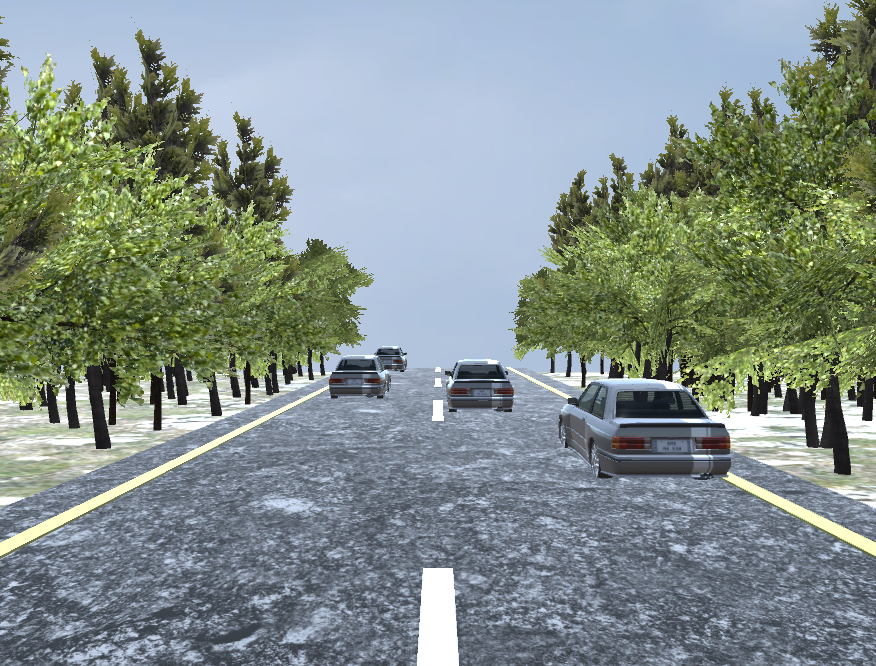

In [90]:
Image.open(final_data[0]['imagePath'])

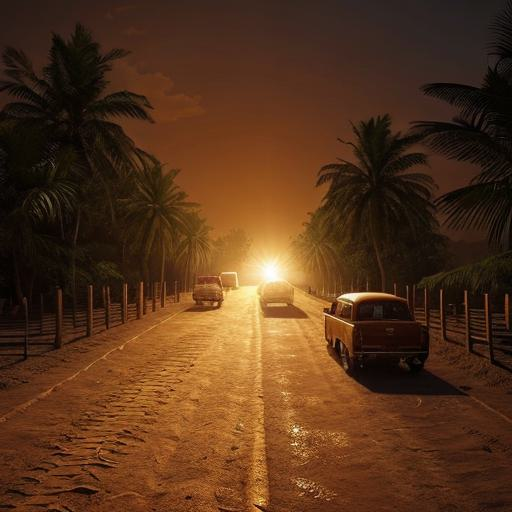

In [91]:
Image.open(final_data[0]['controlNetPath'])